In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv_path = '../data/01_raw/diabetes_data_upload.csv'


In [4]:
df = pd.read_csv(csv_path)

In [5]:
testest = df.loc[df['Gender'] == 'Male']
testest['class'].value_counts()

Negative    181
Positive    147
Name: class, dtype: int64

In [6]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
Age                   520 non-null int64
Gender                520 non-null object
Polyuria              520 non-null object
Polydipsia            520 non-null object
sudden weight loss    520 non-null object
weakness              520 non-null object
Polyphagia            520 non-null object
Genital thrush        520 non-null object
visual blurring       520 non-null object
Itching               520 non-null object
Irritability          520 non-null object
delayed healing       520 non-null object
partial paresis       520 non-null object
muscle stiffness      520 non-null object
Alopecia              520 non-null object
Obesity               520 non-null object
class                 520 non-null object
dtypes: int64(1), object(16)
memory usage: 69.2+ KB


In [9]:
df['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

In [10]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [11]:
df.shape

(520, 17)

In [12]:
sns.set(style='whitegrid')

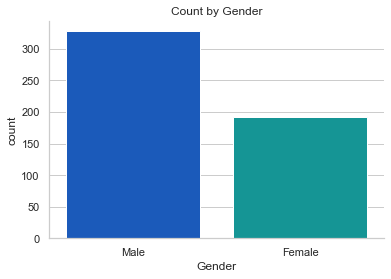

In [13]:
sns.countplot(x=df['Gender'], palette='winter')
plt.title('Count by Gender')
sns.despine()

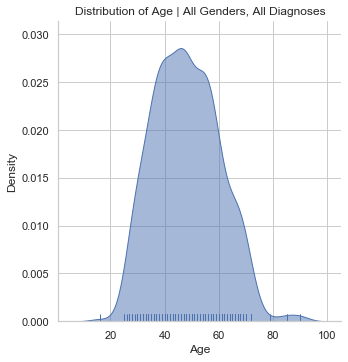

In [14]:
sns.displot(df['Age'], rug=True, kind='kde', fill=True, alpha=0.5, palette='bright')
plt.title("Distribution of Age | All Genders, All Diagnoses")
sns.despine()

Text(0.5, 1, 'Distribution of Age by Gender | All Diagnoses')

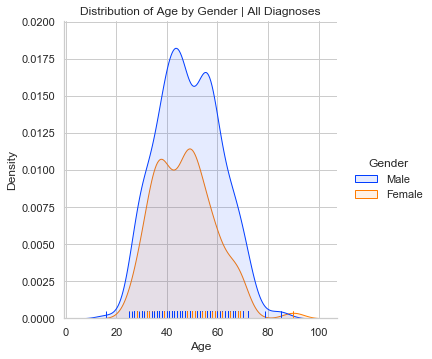

In [15]:
cols = df.columns.tolist()
genders = df['Gender'].unique()

sns.displot(x=df['Age'], hue=df['Gender'], kind='kde', fill=True, palette='bright', alpha=.1, rug=True)
plt.title("Distribution of Age by Gender | All Diagnoses")

In [16]:
# Isolate positive for diabetes
positive_df = df.loc[df['class'] == 'Positive']
print(positive_df['Gender'].value_counts())
pos_len = len(positive_df.index)
print(pos_len)

# Isolate negative for diabetes
negative_df = df.loc[df['class'] == 'Negative']
print(negative_df['Gender'].value_counts())
neg_len = len(negative_df.index)
print(neg_len)


Female    173
Male      147
Name: Gender, dtype: int64
320
Male      181
Female     19
Name: Gender, dtype: int64
200


Text(0.5, 1, 'Distribution of Age by Gender | Positive Diagnosis')

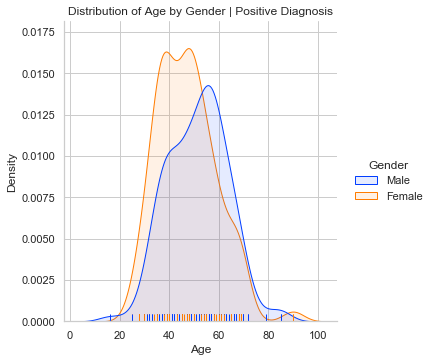

In [17]:
# Isolate positive for diabetes
positive_df = df.loc[df['class'] == 'Positive']

sns.displot(x=positive_df['Age'], kind='kde', fill=True, hue=positive_df['Gender'], alpha=.1, palette='bright', rug=True)
plt.title("Distribution of Age by Gender | Positive Diagnosis")

In [18]:
# Get a count of positive for each categorical variable

In [19]:
total_cols = df.columns.tolist()
total_cols.remove('Age')
total_cols.remove('Gender')


In [20]:
def convert_to_bool(value_in):
    bool_val = None
    if str(value_in) == 'Yes':
        bool_val = True
    elif str(value_in) == 'No':
        bool_val = False
    return bool_val
    
def convert_string_to_bool(value_in, true_value, false_value):
    bool_val = None
    if str(value_in) == true_value:
        bool_val = True
    elif str(value_in) == false_value:
        bool_val = False
    return bool_val

In [21]:
df_cols = df.columns.tolist()
df_cols.remove('Age')
df_cols.remove('class')
df_cols.remove('Gender')
bool_df = df.copy()
for col in df_cols:
    bool_df[col] = bool_df[col].apply(convert_to_bool)
bool_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,False,True,False,True,False,False,False,True,False,True,False,True,True,True,Positive
1,58,Male,False,False,False,True,False,False,True,False,False,False,True,False,True,False,Positive
2,41,Male,True,False,False,True,True,False,False,True,False,True,False,True,True,False,Positive
3,45,Male,False,False,True,True,True,True,False,True,False,True,False,False,False,False,Positive
4,60,Male,True,True,True,True,True,False,True,True,True,True,True,True,True,True,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,True,True,True,False,True,False,False,True,False,True,True,False,False,False,Positive
516,48,Female,True,True,True,True,True,False,False,True,True,True,True,False,False,False,Positive
517,58,Female,True,True,True,True,True,False,True,False,False,False,True,True,False,True,Positive
518,32,Female,False,False,False,True,False,False,True,True,False,True,False,False,True,False,Negative


In [22]:
df.head().reset_index()

,index,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [23]:
total_symptom_df = bool_df.copy()
total_symptom_df = total_symptom_df.drop(['Age', 'class', 'Gender'], axis=1)
total_len = len(total_symptom_df.index)

total_symptom_df = total_symptom_df.sum().reset_index()

column_names = ['symptom', 'Value']
total_symptom_df.columns = column_names

print(total_len)
total_symptom_df['pct_reported'] = total_symptom_df['Value'] / total_len
total_symptom_df = total_symptom_df.sort_values(by=['pct_reported'], ascending=False)
print(total_symptom_df)


520
               symptom  Value  pct_reported
3             weakness    305      0.586538
0             Polyuria    258      0.496154
7              Itching    253      0.486538
9      delayed healing    239      0.459615
4           Polyphagia    237      0.455769
1           Polydipsia    233      0.448077
6      visual blurring    233      0.448077
10     partial paresis    224      0.430769
2   sudden weight loss    217      0.417308
11    muscle stiffness    195      0.375000
12            Alopecia    179      0.344231
8         Irritability    126      0.242308
5       Genital thrush    116      0.223077
13             Obesity     88      0.169231


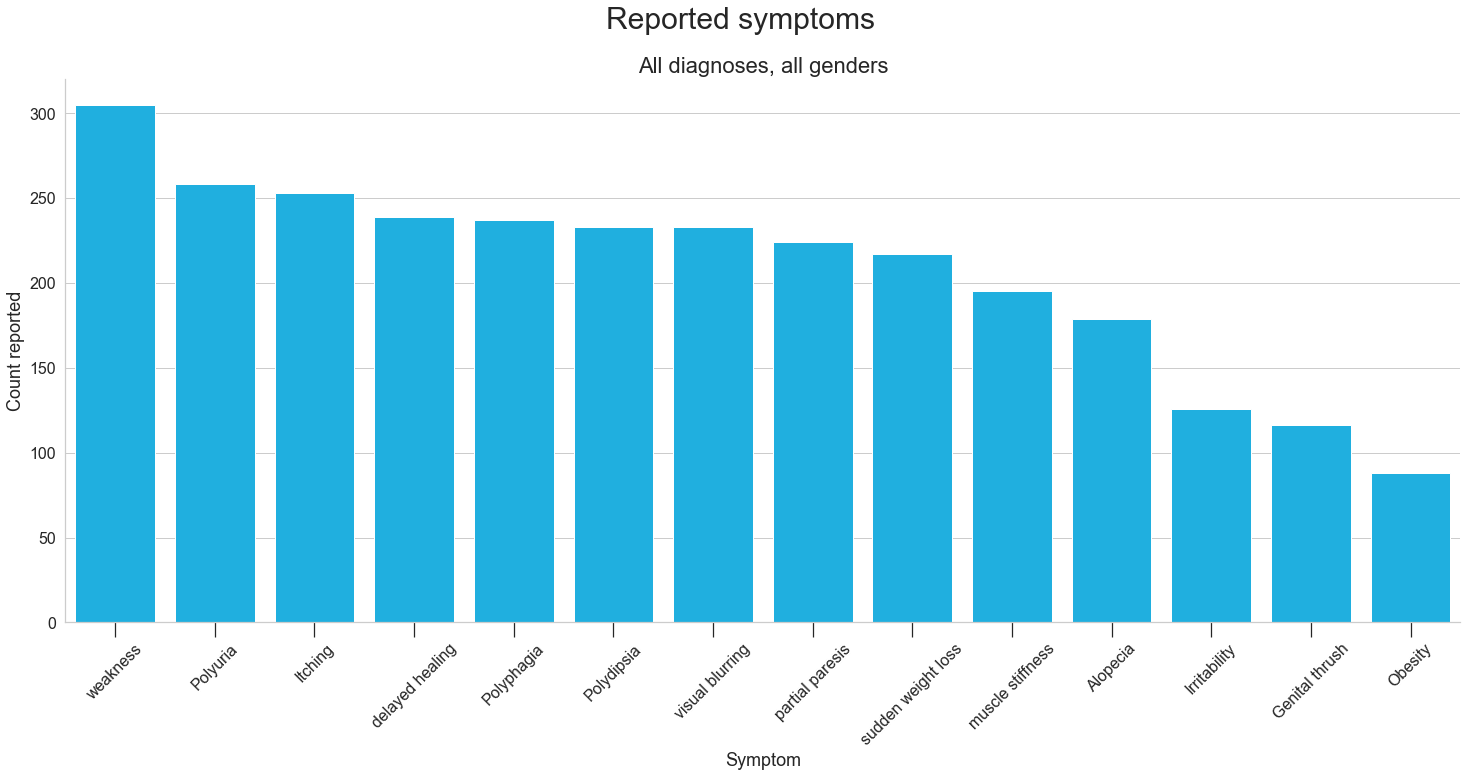

In [24]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

sns.barplot(data=total_symptom_df, x='symptom', y='Value', color='deepskyblue', ci=False, ax=axes)
#sns.barplot(data=sum_df_neg, x='symptom', y='Value', color='tomato', ci=False, ax=axes[1])

title_list = ['Positive', 'Negative']

axes.set_xlabel("Symptom", fontsize=18)
axes.set_ylabel("Count reported",fontsize=18)
axes.tick_params(labelsize=16)
axes.set_title('All diagnoses, all genders', size=22)
axes.tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
axes.tick_params('x', labelrotation=45)
    
fig.suptitle('Reported symptoms', size=30)
sns.despine()




   Age Gender  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0   40   Male     False        True               False      True       False   
1   58   Male     False       False               False      True       False   
2   41   Male      True       False               False      True        True   
3   45   Male     False       False                True      True        True   
4   60   Male      True        True                True      True        True   

   Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0           False            False     True         False             True   
1           False             True    False         False            False   
2           False            False     True         False             True   
3            True            False     True         False             True   
4           False             True     True          True             True   

   partial paresis  muscle stiffness  Alopec

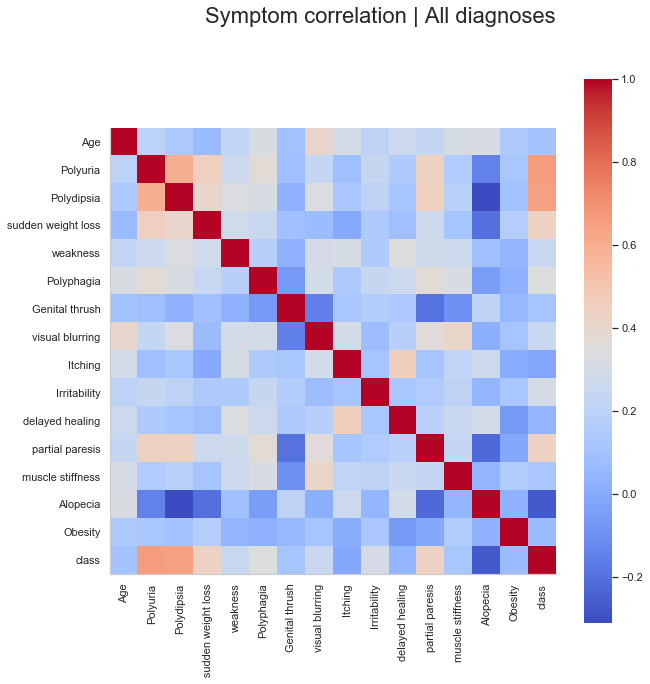

In [60]:
# Correlation of symptoms
corr_df = bool_df.copy()
corr_df['class'] = corr_df[['class']].apply(
    lambda x: convert_string_to_bool(
        value_in=x['class'], 
        true_value='Positive',
        false_value='Negative'
    ),axis=1
)

print(corr_df.head())
# corr_df = corr_df.drop('Age', axis=1)
print(corr_df.info())
corr_df = corr_df.corr()
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(10,10), sharey=True)
sns.heatmap(corr_df, xticklabels=corr_df.columns, yticklabels=corr_df.columns, cmap='coolwarm', ax=axes, square=True)
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
fig.suptitle('Symptom correlation | All diagnoses', size=22)

sns.despine()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 517
Data columns (total 17 columns):
Age                   320 non-null int64
Gender                320 non-null object
Polyuria              320 non-null bool
Polydipsia            320 non-null bool
sudden weight loss    320 non-null bool
weakness              320 non-null bool
Polyphagia            320 non-null bool
Genital thrush        320 non-null bool
visual blurring       320 non-null bool
Itching               320 non-null bool
Irritability          320 non-null bool
delayed healing       320 non-null bool
partial paresis       320 non-null bool
muscle stiffness      320 non-null bool
Alopecia              320 non-null bool
Obesity               320 non-null bool
class                 320 non-null bool
dtypes: bool(15), int64(1), object(1)
memory usage: 12.2+ KB
None


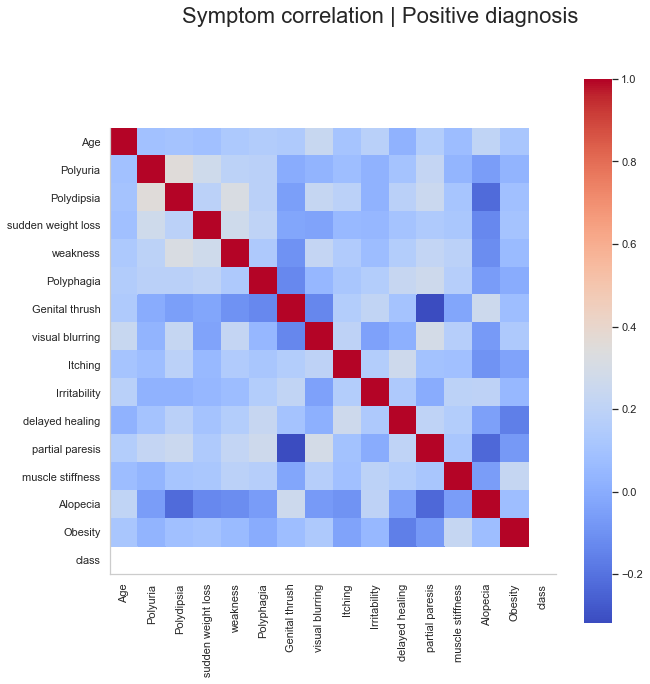

In [59]:
# Correlation of POSITIVE symptoms, all genders
corr_df_pos = bool_df.copy()
corr_df_pos = corr_df_pos.loc[corr_df_pos['class'] == 'Positive']
corr_df_pos['class'] = corr_df_pos[['class']].apply(
    lambda x: convert_string_to_bool(
        value_in=x['class'], 
        true_value='Positive',
        false_value='Negative'
    ),axis=1
)#corr_df_pos = corr_df_pos.drop('Age', axis=1)
print(corr_df_pos.info())
corr_df_pos = corr_df_pos.corr()
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(10,10), sharey=True)
sns.heatmap(corr_df_pos, xticklabels=corr_df.columns, yticklabels=corr_df.columns, cmap='coolwarm', ax=axes, square=True)
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
#axes.set_title('All diagnoses, all genders', size=16)
fig.suptitle('Symptom correlation | Positive diagnosis', size=22)

sns.despine()


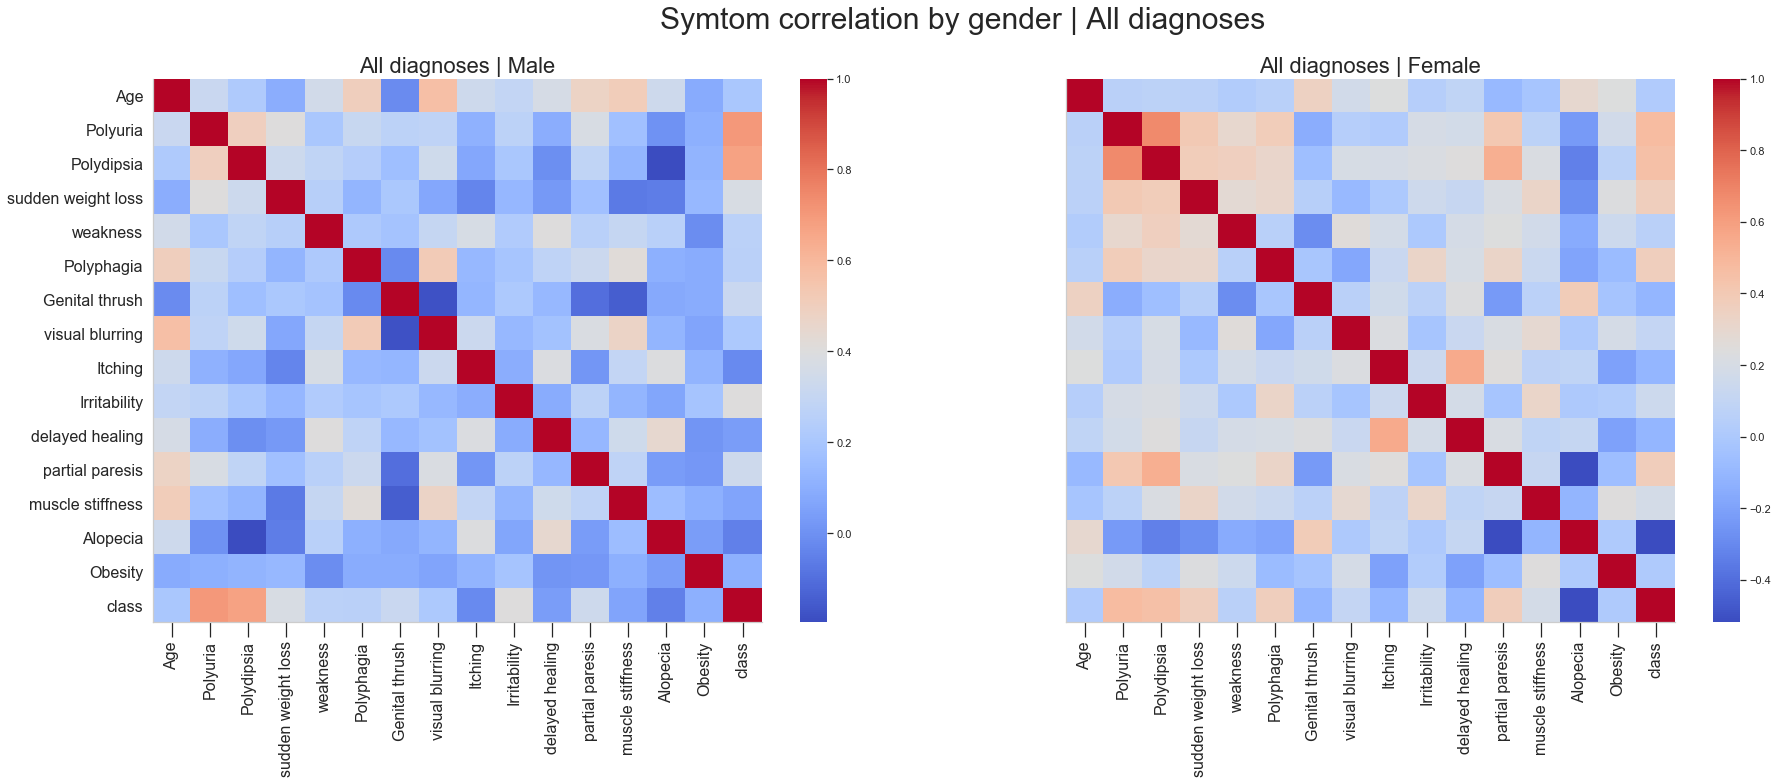

In [58]:
# HEATMAP
# SYMPTOMS BY GENDER
heatmap_pos_dfs = bool_df.copy()
heatmap_pos_dfs = [heatmap_pos_dfs.loc[heatmap_pos_dfs['Gender'] == gender] for gender in genders]


sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(30,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'deepskyblue']
for x, heatmap_pos_df in enumerate(heatmap_pos_dfs):
    current_gender = heatmap_pos_df['Gender'].iloc[0]

    heatmap_pos_df['class'] = heatmap_pos_df[['class']].apply(
    lambda x: convert_string_to_bool(
        value_in=x['class'], 
        true_value='Positive',
        false_value='Negative'
    ),axis=1)
    heatmap_pos_df = heatmap_pos_df.corr()

    sns.heatmap(heatmap_pos_df, xticklabels=heatmap_pos_df.columns, yticklabels=heatmap_pos_df.columns, cmap='coolwarm', ax=axes[x])
    # axes[x].set_xlabel("Symptom", fontsize=18)
    # axes[x].set_ylabel("Count reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'All diagnoses | {current_gender}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=90)
    bottom, top = axes[x].get_ylim()
    axes[x].set_ylim(bottom + 0.5, top - 0.5)
   
    
fig.suptitle('Symtom correlation by gender | All diagnoses', size=30)
sns.despine()

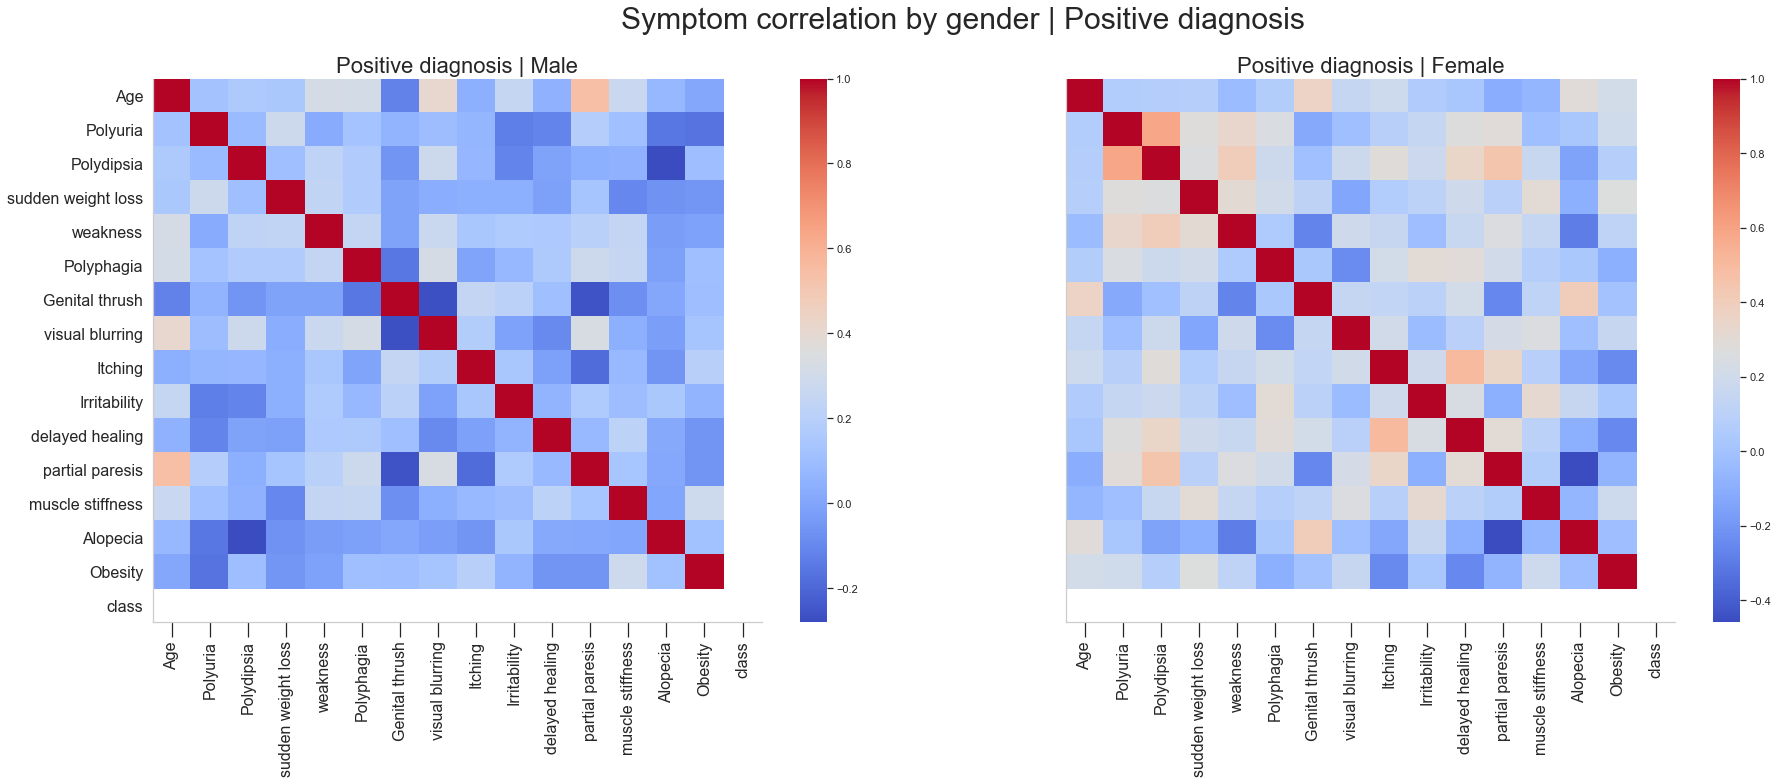

In [57]:
# HEATMAP
# POSITIVE BY GENDER
heatmap_pos_dfs = bool_df.copy()
heatmap_pos_dfs = [heatmap_pos_dfs.loc[heatmap_pos_dfs['Gender'] == gender] for gender in genders]


sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(30,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'deepskyblue']
for x, heatmap_pos_df in enumerate(heatmap_pos_dfs):
    heatmap_pos_df = heatmap_pos_df.copy()
    heatmap_pos_df = heatmap_pos_df.loc[heatmap_pos_df['class'] == 'Positive']
    current_gender = heatmap_pos_df['Gender'].iloc[0]

    heatmap_pos_df['class'] = heatmap_pos_df[['class']].apply(
    lambda x: convert_string_to_bool(
        value_in=x['class'], 
        true_value='Positive',
        false_value='Negative'
    ),axis=1)
    heatmap_pos_df = heatmap_pos_df.corr()

    sns.heatmap(heatmap_pos_df, xticklabels=heatmap_pos_df.columns, yticklabels=heatmap_pos_df.columns, cmap='coolwarm', ax=axes[x])
    # axes[x].set_xlabel("Symptom", fontsize=18)
    # axes[x].set_ylabel("Count reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'Positive diagnosis | {current_gender}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=90)
    bottom, top = axes[x].get_ylim()
    axes[x].set_ylim(bottom + 0.5, top - 0.5)
   
    
fig.suptitle('Symptom correlation by gender | Positive diagnosis', size=30)
sns.despine()

Create sum of all True symptoms.
Groupby class and gender
Create 2 dataframes, 1 for positive, 1 for negative
This will be used later to graph total reported symptoms for male/female for both positive/negative cases

In [24]:
sum_df_gender = bool_df.copy()
sum_df_gender = sum_df_gender.drop('Age', axis=1)

# Positive df
sum_df_gender_pos = sum_df_gender.loc[sum_df_gender['class'] == 'Positive']
# Length of positive male
sum_df_gender_pos_male_len = sum_df_gender_pos.loc[sum_df_gender_pos['Gender'] == 'Male']
sum_df_gender_pos_male_len = len(sum_df_gender_pos_male_len.index)
# Length of positive female
sum_df_gender_pos_female_len = sum_df_gender_pos.loc[sum_df_gender_pos['Gender'] == 'Female']
sum_df_gender_pos_female_len = len(sum_df_gender_pos_female_len.index)

sum_df_gender_pos = sum_df_gender_pos.groupby(['class', 'Gender']).sum().reset_index()
sum_df_gender_pos = sum_df_gender_pos.melt(id_vars=['class', 'Gender'], var_name="symptom", value_name="Value")
sum_df_gender_pos = sum_df_gender_pos.sort_values(by=['Value'], ascending=False)



# Negative df
sum_df_gender_neg = sum_df_gender.loc[sum_df_gender['class'] == 'Negative']
# Length of negative male
sum_df_gender_neg_male_len = sum_df_gender_neg.loc[sum_df_gender_neg['Gender'] == 'Male']
sum_df_gender_neg_male_len = len(sum_df_gender_neg_male_len.index)
# Length of negative female
sum_df_gender_neg_female_len = sum_df_gender_neg.loc[sum_df_gender_neg['Gender'] == 'Female']
#print(sum_df_gender_neg_female_len.head())
sum_df_gender_neg_female_len = len(sum_df_gender_neg_female_len.index)

sum_df_gender_neg = sum_df_gender_neg.groupby(['class', 'Gender']).sum().reset_index()
sum_df_gender_neg = sum_df_gender_neg.melt(id_vars=['class', 'Gender'], var_name="symptom", value_name="Value")
sum_df_gender_neg = sum_df_gender_neg.sort_values(by=['Value'], ascending=False)


pos_genders_len_list = [sum_df_gender_pos_male_len, sum_df_gender_pos_female_len]
neg_genders_len_list = [sum_df_gender_neg_male_len, sum_df_gender_neg_female_len]

print(sum_df_gender_pos.head())
print(sum_df_gender_neg)

       class  Gender             symptom  Value
0   Positive  Female            Polyuria  129.0
2   Positive  Female          Polydipsia  125.0
20  Positive  Female     partial paresis  122.0
6   Positive  Female            weakness  117.0
4   Positive  Female  sudden weight loss  114.0
       class  Gender             symptom  Value
25  Negative    Male            Alopecia   88.0
15  Negative    Male             Itching   86.0
7   Negative    Male            weakness   76.0
19  Negative    Male     delayed healing   73.0
23  Negative    Male    muscle stiffness   57.0
13  Negative    Male     visual blurring   50.0
9   Negative    Male          Polyphagia   47.0
21  Negative    Male     partial paresis   30.0
11  Negative    Male      Genital thrush   29.0
5   Negative    Male  sudden weight loss   28.0
27  Negative    Male             Obesity   24.0
17  Negative    Male        Irritability   15.0
1   Negative    Male            Polyuria   15.0
24  Negative  Female            Alopecia

Same thing but without gender

In [25]:
sum_df = bool_df.copy()
sum_df = sum_df.drop('Age', axis=1)
sum_df = sum_df.groupby(['class']).sum().reset_index()
sum_df = sum_df.melt(id_vars=['class'], var_name="symptom", 
        value_name="Value")

sum_df = sum_df.sort_values(by=['Value'], ascending=False)
sum_df_pos = sum_df.loc[sum_df['class'] == 'Positive']
sum_df_neg = sum_df.loc[sum_df['class'] == 'Negative']
sum_df.head()

,class,symptom,Value
1,Positive,Polyuria,243.0
3,Positive,Polydipsia,225.0
7,Positive,weakness,218.0
21,Positive,partial paresis,192.0
9,Positive,Polyphagia,189.0


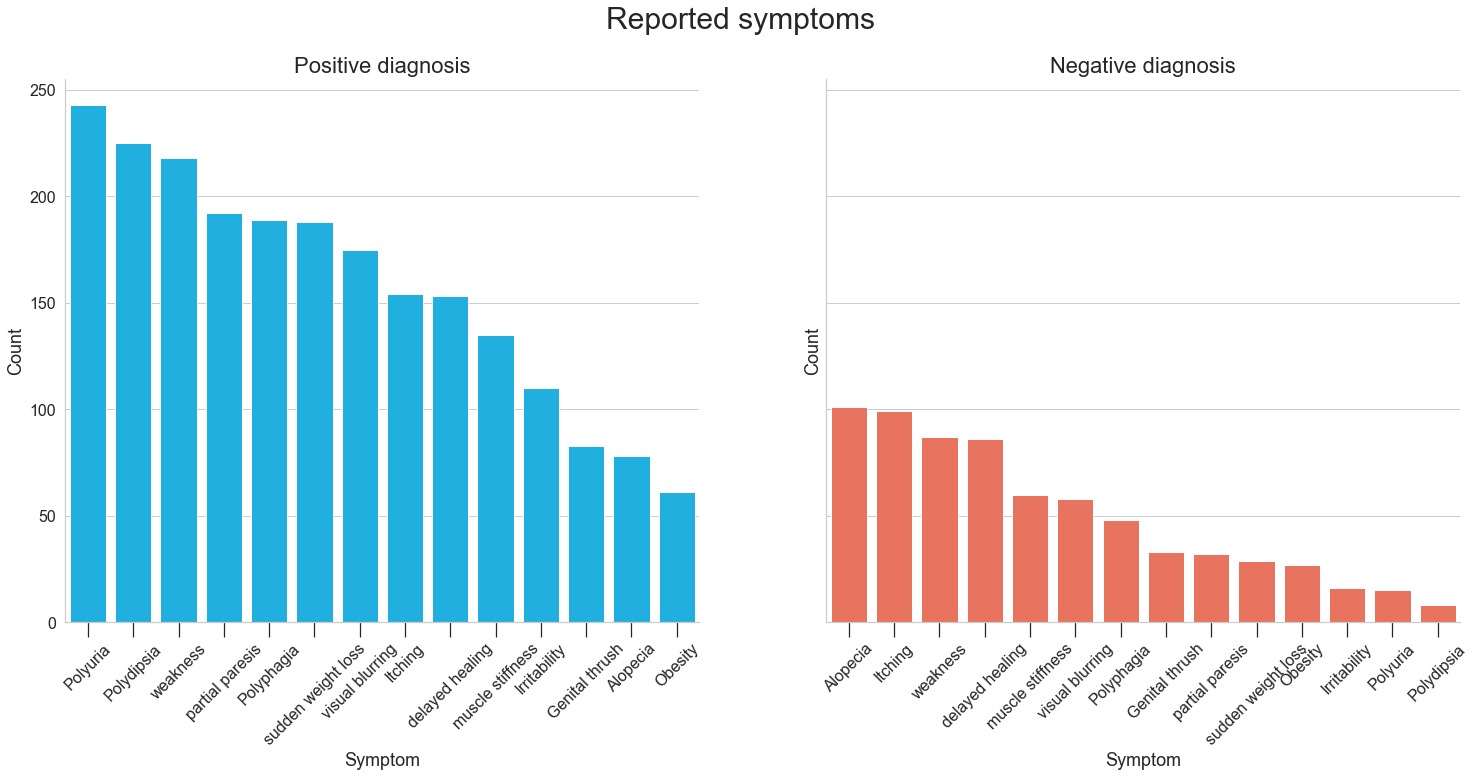

In [26]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

sns.barplot(data=sum_df_pos, x='symptom', y='Value', color='deepskyblue', ci=False, ax=axes[0])
sns.barplot(data=sum_df_neg, x='symptom', y='Value', color='tomato', ci=False, ax=axes[1])

title_list = ['Positive', 'Negative']

for x, ax in enumerate(axes):
    
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Count",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'{title_list[x]} diagnosis', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
    
fig.suptitle('Reported symptoms', size=30)
sns.despine()




In [27]:
# Create % reported for each symptom
print("Positive")
sum_df_pos = sum_df_pos.copy()
sum_df_pos['pct_reported'] = sum_df_pos['Value']/pos_len * 100
print(sum_df_pos.head(10))

print("Negative")
sum_df_neg = sum_df_neg.copy()
sum_df_neg['pct_reported'] = sum_df_neg['Value']/neg_len * 100
print(sum_df_neg.head(10))

Positive
       class             symptom  Value  pct_reported
1   Positive            Polyuria  243.0       75.9375
3   Positive          Polydipsia  225.0       70.3125
7   Positive            weakness  218.0       68.1250
21  Positive     partial paresis  192.0       60.0000
9   Positive          Polyphagia  189.0       59.0625
5   Positive  sudden weight loss  188.0       58.7500
13  Positive     visual blurring  175.0       54.6875
15  Positive             Itching  154.0       48.1250
19  Positive     delayed healing  153.0       47.8125
23  Positive    muscle stiffness  135.0       42.1875
Negative
       class             symptom  Value  pct_reported
24  Negative            Alopecia  101.0          50.5
14  Negative             Itching   99.0          49.5
6   Negative            weakness   87.0          43.5
18  Negative     delayed healing   86.0          43.0
22  Negative    muscle stiffness   60.0          30.0
12  Negative     visual blurring   58.0          29.0
8   Negati

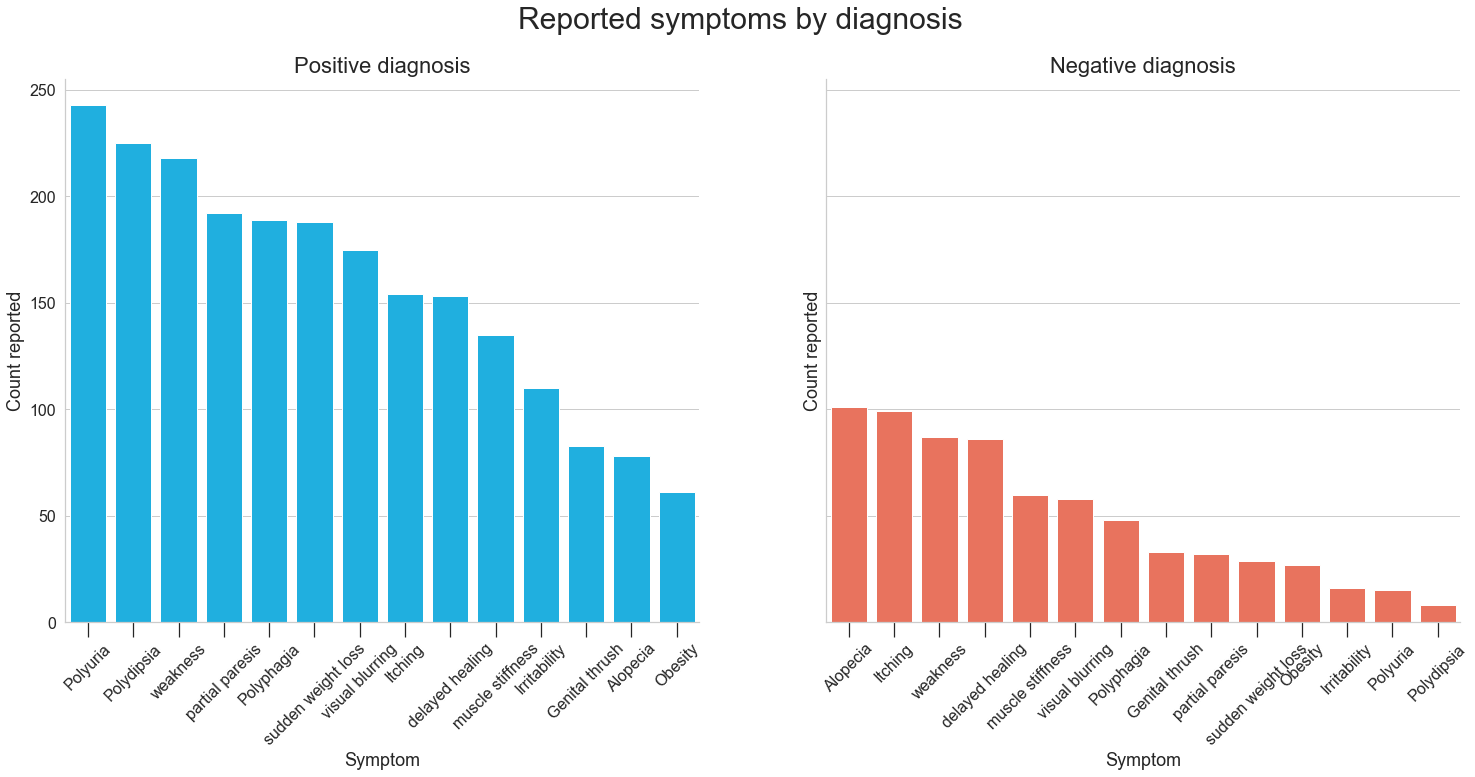

In [28]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

sns.barplot(data=sum_df_pos, x='symptom', y='Value', color='deepskyblue', ci=False, ax=axes[0])
sns.barplot(data=sum_df_neg, x='symptom', y='Value', color='tomato', ci=False, ax=axes[1])

title_list = ['Positive', 'Negative']

left, width = .5, .5
bottom, height = .5, .45
right = left + width
top = bottom + height

for x, ax in enumerate(axes):
    
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Count reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'{title_list[x]} diagnosis', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
#     axes[x].text(right, top, 'All genders',
#         horizontalalignment='right',
#         verticalalignment='top',
#         transform=ax.transAxes)
    
fig.suptitle('Reported symptoms by diagnosis', size=30)


sns.despine()




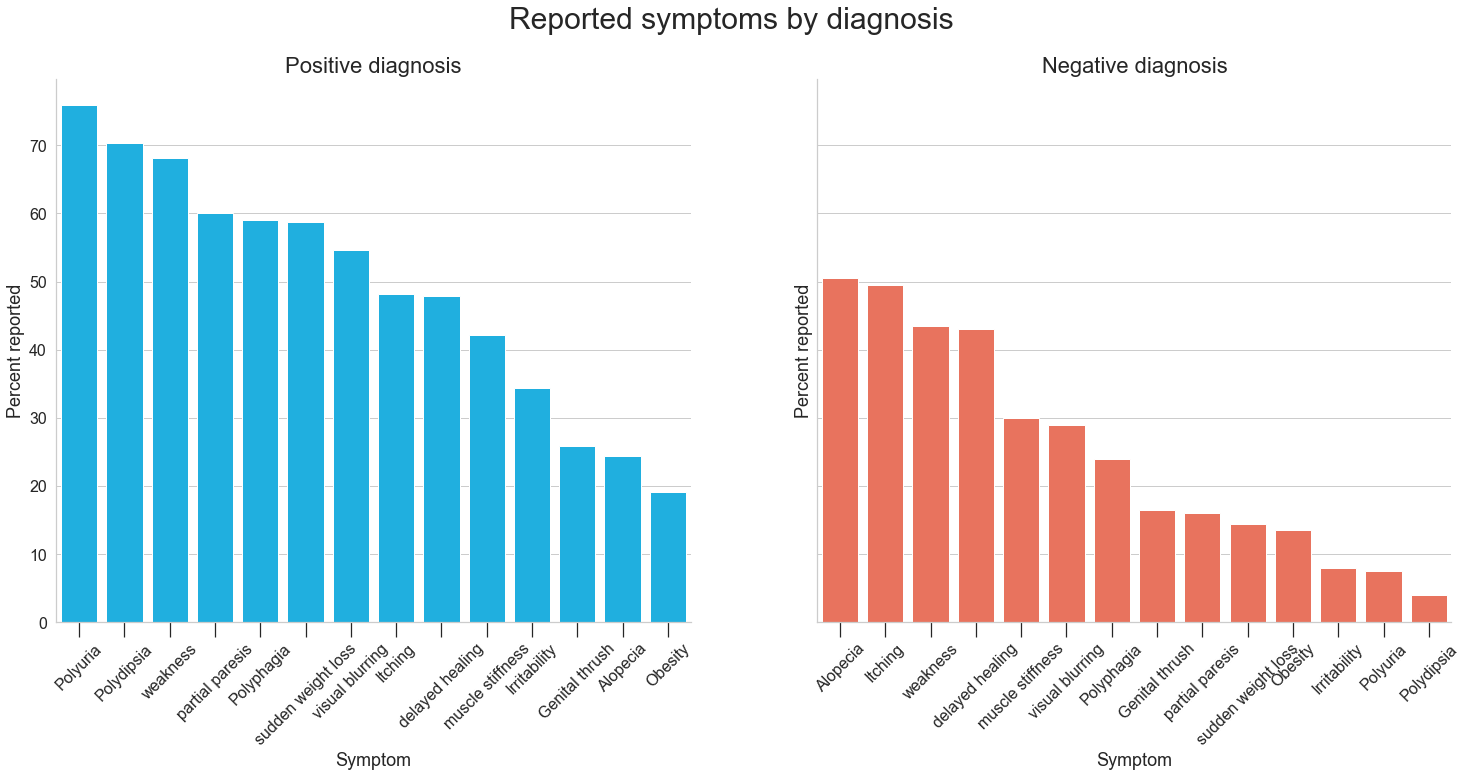

In [29]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

sns.barplot(data=sum_df_pos, x='symptom', y='pct_reported', color='deepskyblue', ci=False, ax=axes[0])
sns.barplot(data=sum_df_neg, x='symptom', y='pct_reported', color='tomato', ci=False, ax=axes[1])

title_list = ['Positive', 'Negative']

left, width = .5, .5
bottom, height = .5, .45
right = left + width
top = bottom + height

for x, ax in enumerate(axes):
    
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Percent reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'{title_list[x]} diagnosis', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
#     axes[x].text(right, top, 'All genders',
#         horizontalalignment='right',
#         verticalalignment='top',
#         transform=ax.transAxes)
    
fig.suptitle('Reported symptoms by diagnosis', size=30)


sns.despine()




In [30]:
# positive diagnosis df for each gender
sum_pos_genders_dfs = [sum_df_gender_pos.loc[sum_df_gender_pos['Gender'] == gender] for gender in genders]
    
# negative diagnosis df for each gender
sum_neg_genders_dfs = [sum_df_gender_neg.loc[sum_df_gender_neg['Gender'] == gender] for gender in genders]
for x, sum_neg_genders_df in enumerate(sum_neg_genders_dfs):
#     sum_neg_genders_df = sum_neg_genders_df.copy()
#     sum_neg_genders_df['pct_reported'] = sum_neg_genders_df['Value'] / neg_genders_len_list[x]
    print(neg_genders_len_list[x])
    print(sum_neg_genders_df.head())


181
       class Gender           symptom  Value
25  Negative   Male          Alopecia   88.0
15  Negative   Male           Itching   86.0
7   Negative   Male          weakness   76.0
19  Negative   Male   delayed healing   73.0
23  Negative   Male  muscle stiffness   57.0
19
       class  Gender          symptom  Value
24  Negative  Female         Alopecia   13.0
18  Negative  Female  delayed healing   13.0
14  Negative  Female          Itching   13.0
6   Negative  Female         weakness   11.0
12  Negative  Female  visual blurring    8.0


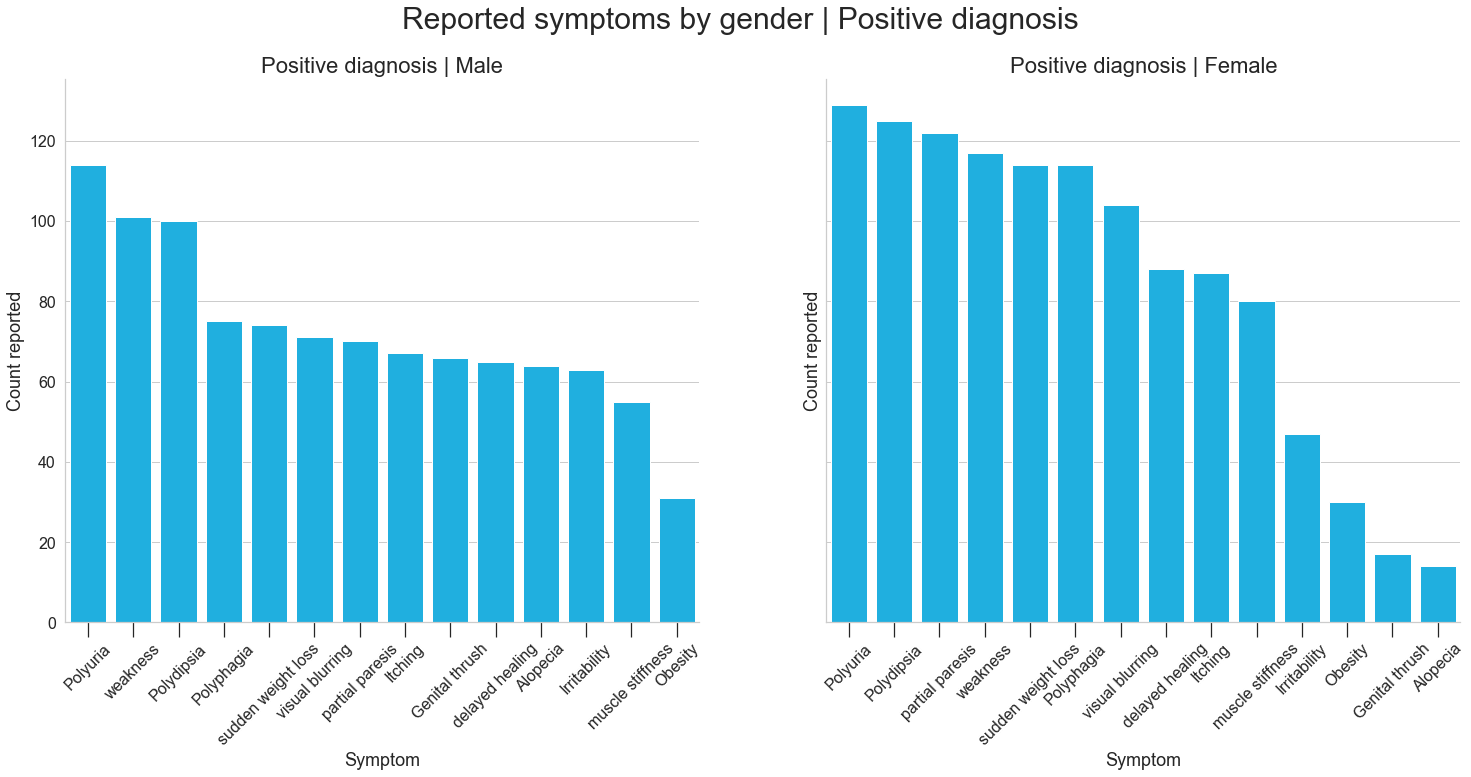

In [31]:

sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'deepskyblue']
for x, sum_pos_genders_df in enumerate(sum_pos_genders_dfs):
    sns.barplot(data=sum_pos_genders_df, x='symptom', y='Value', color=color_list[x], ci=False, ax=axes[x])
    current_gender = sum_pos_genders_df['Gender'].iloc[0]
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Count reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'Positive diagnosis | {current_gender}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
   
    
fig.suptitle('Reported symptoms by gender | Positive diagnosis', size=30)
sns.despine()

       class Gender             symptom  Value  pct_reported
1   Positive   Male            Polyuria  114.0     77.551020
7   Positive   Male            weakness  101.0     68.707483
3   Positive   Male          Polydipsia  100.0     68.027211
9   Positive   Male          Polyphagia   75.0     51.020408
5   Positive   Male  sudden weight loss   74.0     50.340136
13  Positive   Male     visual blurring   71.0     48.299320
21  Positive   Male     partial paresis   70.0     47.619048
15  Positive   Male             Itching   67.0     45.578231
11  Positive   Male      Genital thrush   66.0     44.897959
19  Positive   Male     delayed healing   65.0     44.217687
25  Positive   Male            Alopecia   64.0     43.537415
17  Positive   Male        Irritability   63.0     42.857143
23  Positive   Male    muscle stiffness   55.0     37.414966
27  Positive   Male             Obesity   31.0     21.088435
       class  Gender             symptom  Value  pct_reported
0   Positive  Female   

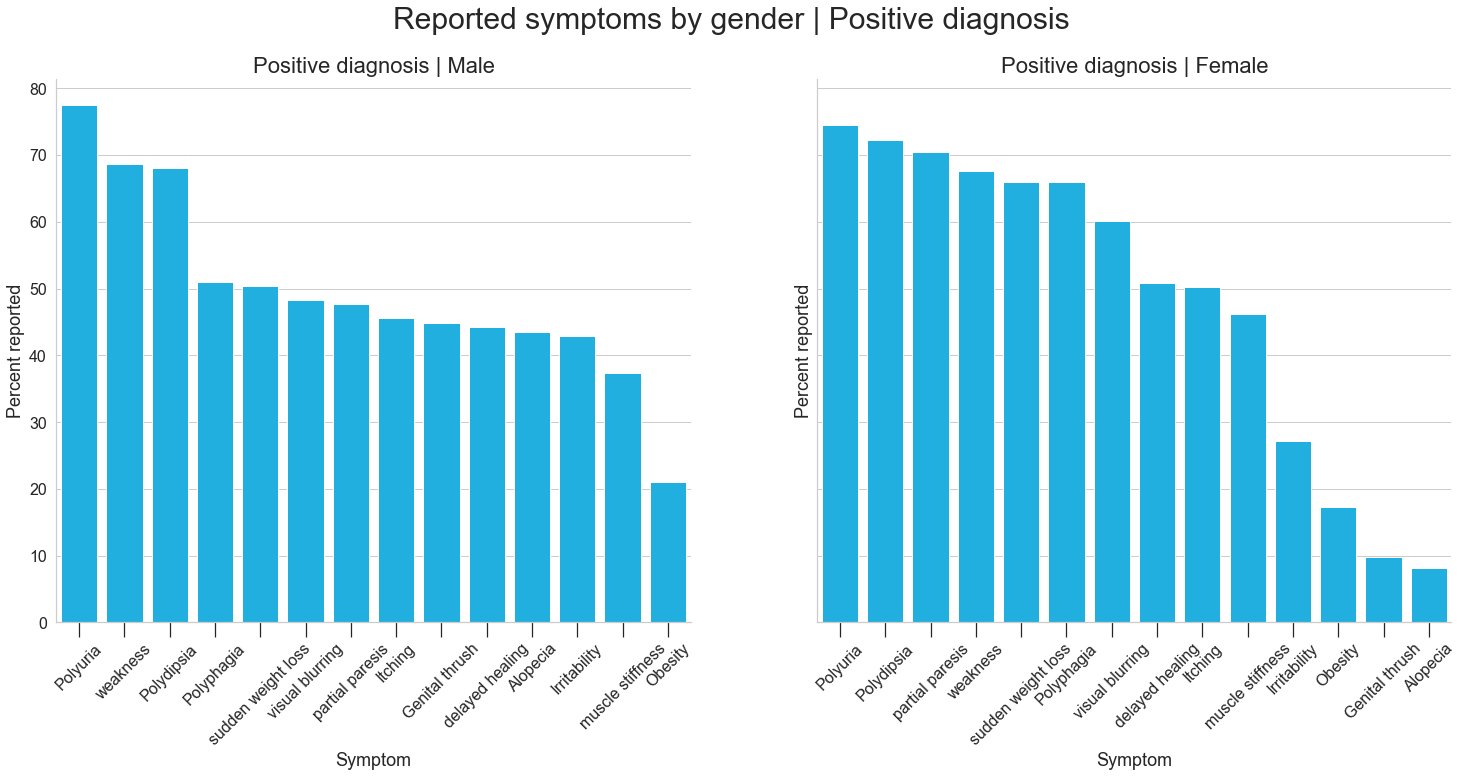

In [32]:

sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'lightseagreen']
for x, sum_pos_genders_df in enumerate(sum_pos_genders_dfs):
    sum_pos_genders_df = sum_pos_genders_df.copy()
    sum_pos_genders_df['pct_reported'] = sum_pos_genders_df['Value'] / pos_genders_len_list[x] * 100
    sns.barplot(data=sum_pos_genders_df, x='symptom', y='pct_reported', color='deepskyblue', ci=False, ax=axes[x])
    current_gender = sum_pos_genders_df['Gender'].iloc[0]

    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Percent reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'Positive diagnosis | {current_gender}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
    
    print(sum_pos_genders_df)
   
    
fig.suptitle('Reported symptoms by gender | Positive diagnosis', size=30)
sns.despine()

       class Gender             symptom  Value
25  Negative   Male            Alopecia   88.0
15  Negative   Male             Itching   86.0
7   Negative   Male            weakness   76.0
19  Negative   Male     delayed healing   73.0
23  Negative   Male    muscle stiffness   57.0
13  Negative   Male     visual blurring   50.0
9   Negative   Male          Polyphagia   47.0
21  Negative   Male     partial paresis   30.0
11  Negative   Male      Genital thrush   29.0
5   Negative   Male  sudden weight loss   28.0
27  Negative   Male             Obesity   24.0
17  Negative   Male        Irritability   15.0
1   Negative   Male            Polyuria   15.0
3   Negative   Male          Polydipsia    8.0
       class  Gender             symptom  Value
24  Negative  Female            Alopecia   13.0
18  Negative  Female     delayed healing   13.0
14  Negative  Female             Itching   13.0
6   Negative  Female            weakness   11.0
12  Negative  Female     visual blurring    8.0
10  Neg

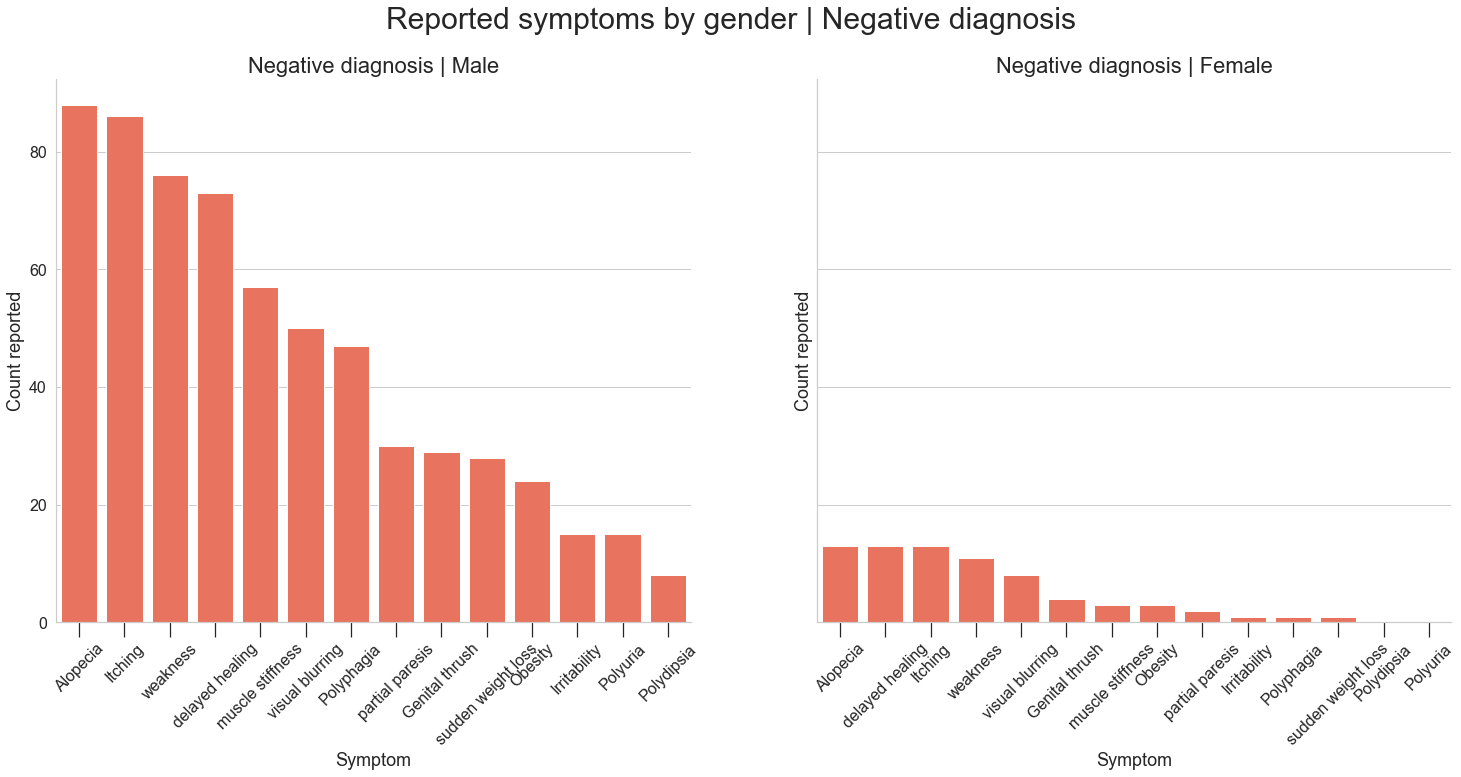

In [40]:

sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'lightseagreen']
for x, sum_neg_genders_df in enumerate(sum_neg_genders_dfs):
    sns.barplot(data=sum_neg_genders_df, x='symptom', y='Value', color='tomato', ci=False, ax=axes[x])
    
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Count reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'Negative diagnosis | {title_list[x]}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
    
    
    
fig.suptitle('Reported symptoms by gender | Negative diagnosis', size=30)
sns.despine()

       class Gender             symptom  Value  pct_reported
25  Negative   Male            Alopecia   88.0     48.618785
15  Negative   Male             Itching   86.0     47.513812
7   Negative   Male            weakness   76.0     41.988950
19  Negative   Male     delayed healing   73.0     40.331492
23  Negative   Male    muscle stiffness   57.0     31.491713
13  Negative   Male     visual blurring   50.0     27.624309
9   Negative   Male          Polyphagia   47.0     25.966851
21  Negative   Male     partial paresis   30.0     16.574586
11  Negative   Male      Genital thrush   29.0     16.022099
5   Negative   Male  sudden weight loss   28.0     15.469613
27  Negative   Male             Obesity   24.0     13.259669
17  Negative   Male        Irritability   15.0      8.287293
1   Negative   Male            Polyuria   15.0      8.287293
3   Negative   Male          Polydipsia    8.0      4.419890
       class  Gender             symptom  Value  pct_reported
24  Negative  Female   

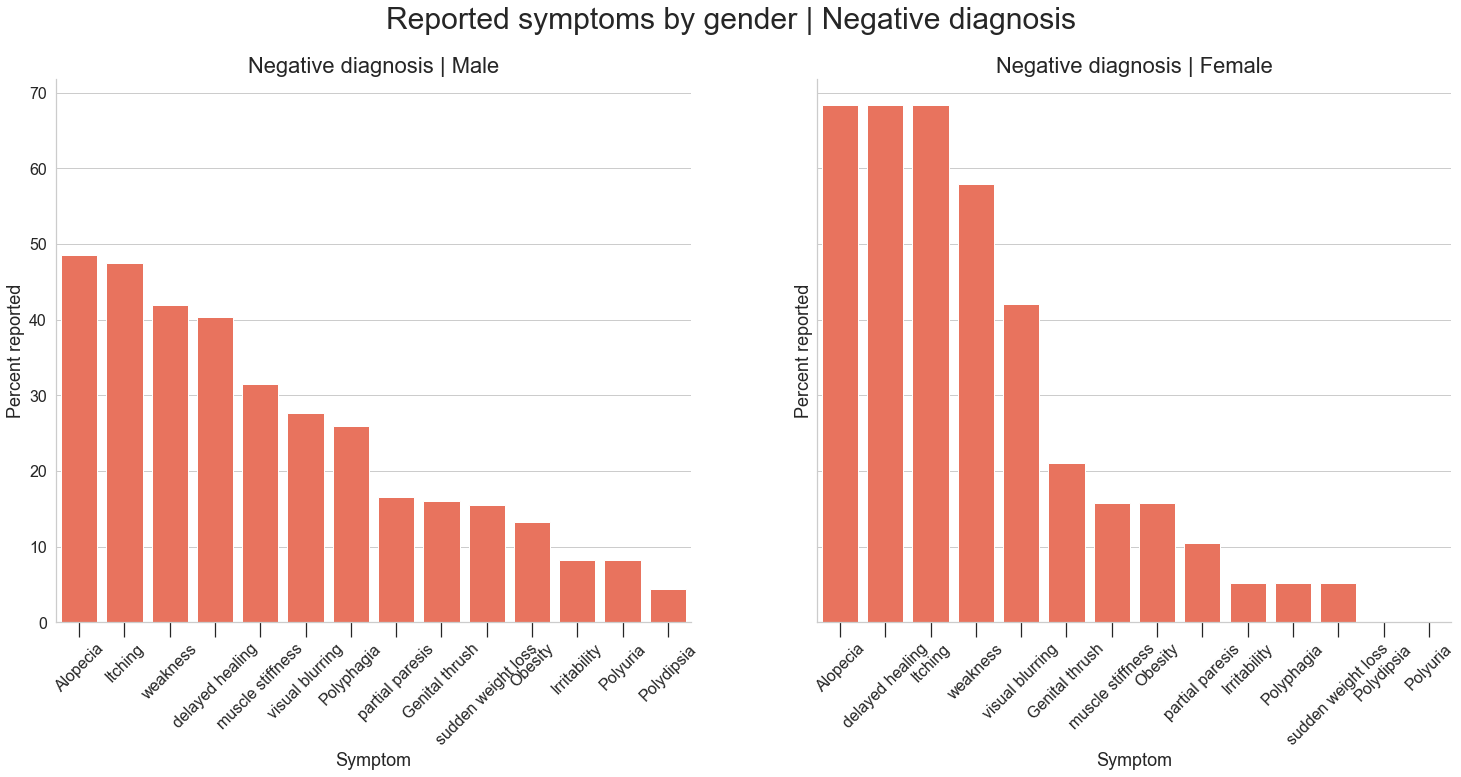

In [41]:

sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'lightseagreen']
for x, sum_neg_genders_df in enumerate(sum_neg_genders_dfs):
    sum_neg_genders_df = sum_neg_genders_df.copy()
    sum_neg_genders_df['pct_reported'] = sum_neg_genders_df['Value'] / neg_genders_len_list[x] * 100
    sns.barplot(data=sum_neg_genders_df, x='symptom', y='pct_reported', color='tomato', ci=False, ax=axes[x])
    
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Percent reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'Negative diagnosis | {title_list[x]}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
   
    print(sum_neg_genders_df)
fig.suptitle('Reported symptoms by gender | Negative diagnosis', size=30)
sns.despine()



In [35]:
grouped_df = bool_df.copy()
grouped_df = grouped_df.drop('Age', axis=1)
grouped_df = grouped_df.groupby(['Gender', 'class']).sum().reset_index()
grouped_df

,Gender,class,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,Female,Negative,0.0,0.0,1.0,11.0,1.0,4.0,8.0,13.0,1.0,13.0,2.0,3.0,13.0,3.0
1,Female,Positive,129.0,125.0,114.0,117.0,114.0,17.0,104.0,87.0,47.0,88.0,122.0,80.0,14.0,30.0
2,Male,Negative,15.0,8.0,28.0,76.0,47.0,29.0,50.0,86.0,15.0,73.0,30.0,57.0,88.0,24.0
3,Male,Positive,114.0,100.0,74.0,101.0,75.0,66.0,71.0,67.0,63.0,65.0,70.0,55.0,64.0,31.0


In [36]:
melt_df = grouped_df.copy()
melt_df = melt_df.melt(id_vars=["Gender", "class"], 
        var_name="symptom", 
        value_name="Value")

melt_df = melt_df.sort_values(by=['Value', 'class'], ascending=False)
print(melt_df.head(15))

    Gender     class             symptom  Value
1   Female  Positive            Polyuria  129.0
5   Female  Positive          Polydipsia  125.0
41  Female  Positive     partial paresis  122.0
13  Female  Positive            weakness  117.0
3     Male  Positive            Polyuria  114.0
9   Female  Positive  sudden weight loss  114.0
17  Female  Positive          Polyphagia  114.0
25  Female  Positive     visual blurring  104.0
15    Male  Positive            weakness  101.0
7     Male  Positive          Polydipsia  100.0
37  Female  Positive     delayed healing   88.0
50    Male  Negative            Alopecia   88.0
29  Female  Positive             Itching   87.0
30    Male  Negative             Itching   86.0
45  Female  Positive    muscle stiffness   80.0


Text(0.5, 1.0, 'Reported symptoms by gender')

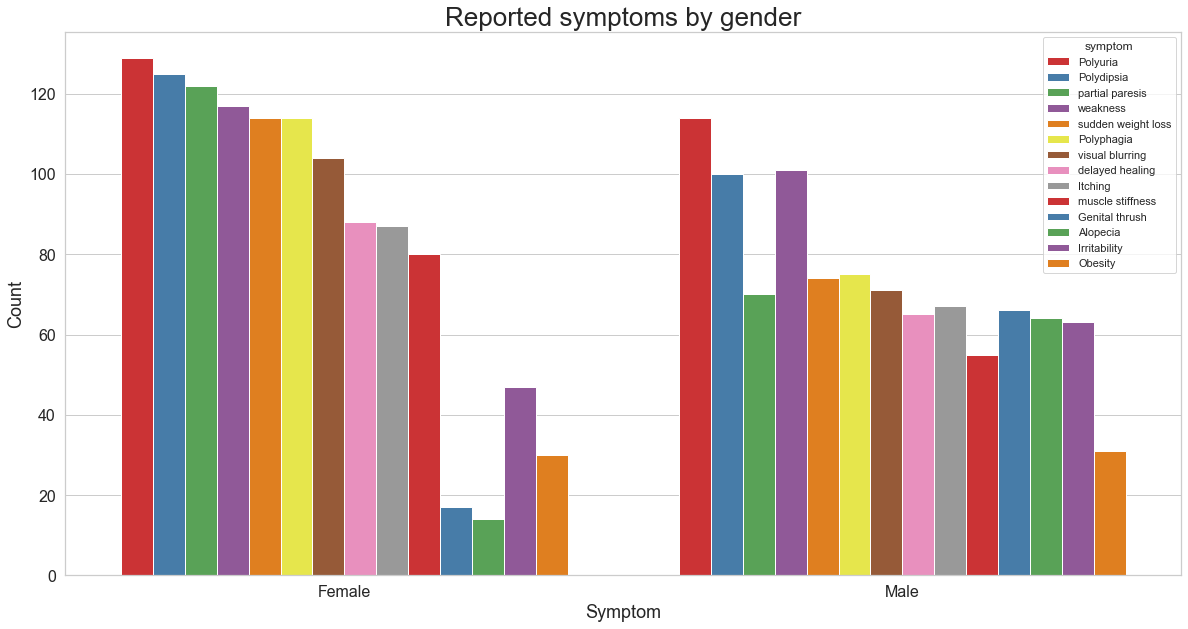

In [37]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(1,1, figsize=(20,10))
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)
pos = melt_df.loc[melt_df['class'] == 'Positive']
pos = pos.sort_values(by=['Value'], ascending=False)
sns.barplot(data=pos, x='Gender', y='Value', hue='symptom', palette='Set1', ci=False, ax=ax)
ax.set_xlabel("Symptom", fontsize=18)
ax.set_ylabel("Count",fontsize=18)
ax.tick_params(labelsize=16)
plt.xticks(rotation=0)                                                               


plt.title("Reported symptoms by gender", size=26)

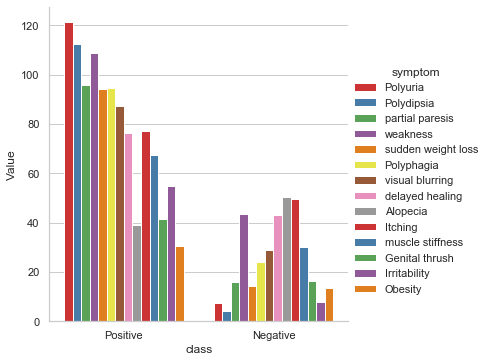

In [38]:
gender_dfs = [melt_df.loc[melt_df['Gender'] == gender] for gender in genders]
# Combined genders
sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

4


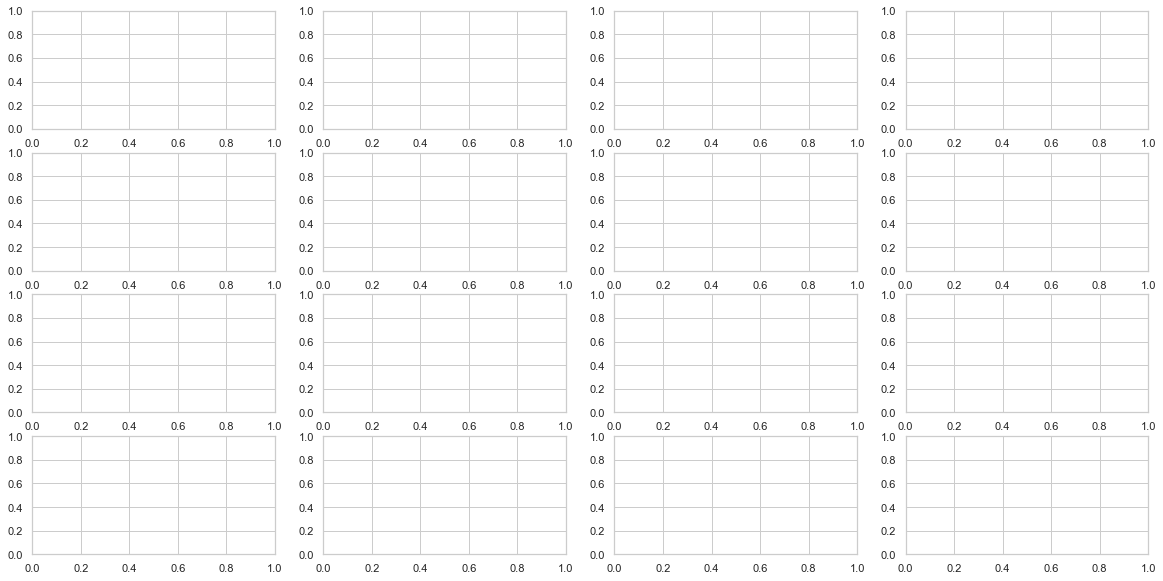

In [39]:
# Create grid
from math import ceil

len_total_cols = (len(total_cols))
cols_per_row = 4
num_rows = ceil(len_total_cols / cols_per_row)
print(num_rows)
fig, ax = plt.subplots(num_rows,cols_per_row, figsize=(20,10))
